In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938210
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325798
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298737
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721909
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245941


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


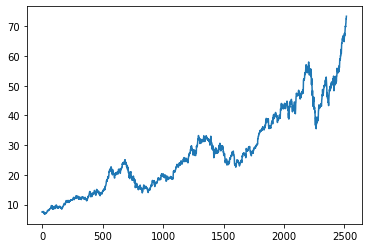

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

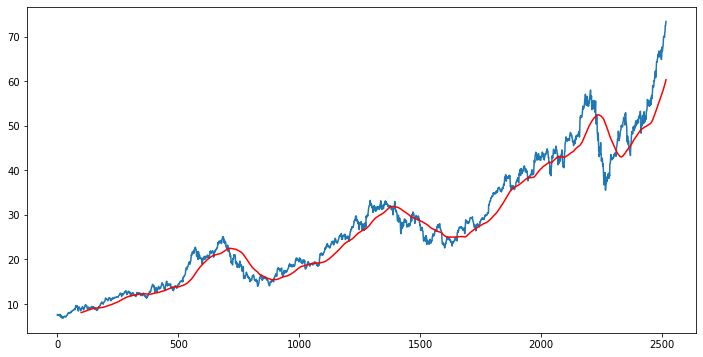

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

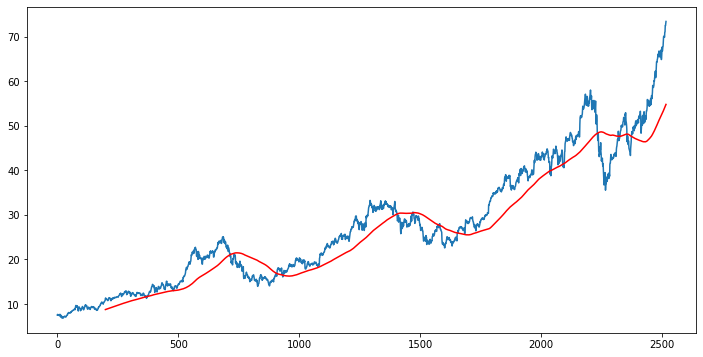

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200, 'r')

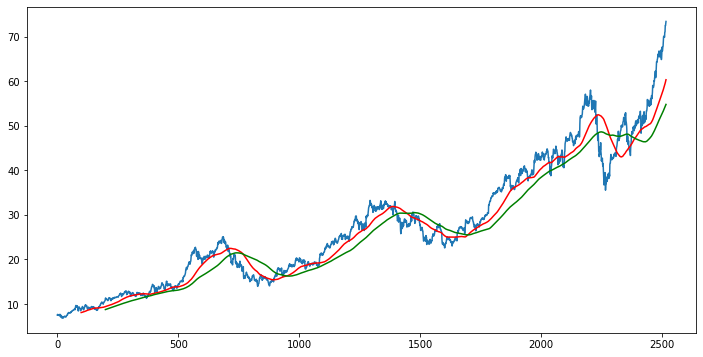

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(2517, 5)

In [17]:
#splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [18]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [19]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [ ]:
from sklearn.preprocessing import MinMaxScalar